# Naïve Bayes models and Bayesian networks 

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

heart_data = pd.read_csv("C:\\Users\\somana gouda\\OneDrive\\Desktop\\heart.csv")
print(heart_data.head())
print(heart_data.isnull().sum())
print(heart_data.dtypes)
X = heart_data.drop('target', axis=1)
y = heart_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang       

# Simple linear regression algorithm 

Mean Squared Error: 0.65
R-squared: 0.81


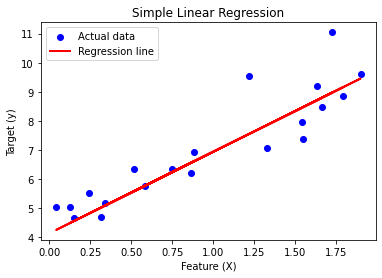

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Generate a simple synthetic dataset
# Let's create a dataset where 'X' is the independent variable and 'y' is the dependent variable (target)
# X: Feature (e.g., number of hours studied), y: Target (e.g., score)

# Generate random data (for simplicity)
np.random.seed(42)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # 100 data points with a single feature (X)
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with some noise (y = 4 + 3*X + noise)

# 2. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create a linear regression model
model = LinearRegression()

# 4. Train the model on the training data
model.fit(X_train, y_train)

# 5. Make predictions on the test data
y_pred = model.predict(X_test)

# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# 7. Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


# Support Vector Machine (SVM) for binary classification

# ID3 decision tree algorithm

In [15]:
import pandas as pd
import numpy as np
from collections import Counter

# Function to calculate entropy
def entropy(data):
    labels = data.iloc[:, -1]  # The last column is the target
    total = len(labels)
    count = Counter(labels)
    entropy_value = 0
    for key in count:
        prob = count[key] / total
        entropy_value -= prob * np.log2(prob)
    return entropy_value

# Function to calculate information gain
def information_gain(data, attribute):
    total_entropy = entropy(data)
    total = len(data)
    values = data[attribute].unique()
    
    weighted_entropy = 0
    for value in values:
        subset = data[data[attribute] == value]
        weighted_entropy += (len(subset) / total) * entropy(subset)
        
    return total_entropy - weighted_entropy

# Function to select the best attribute to split on
def best_attribute(data):
    attributes = data.columns[:-1]  # Exclude the target column
    info_gains = {attribute: information_gain(data, attribute) for attribute in attributes}
    return max(info_gains, key=info_gains.get)

# Function to build the decision tree
def build_tree(data):
    # If all examples have the same target label, return the label
    if len(data.iloc[:, -1].unique()) == 1:
        return data.iloc[0, -1]
    
    # If there are no more attributes to split on, return the majority label
    if len(data.columns) == 1:
        return Counter(data.iloc[:, -1]).most_common(1)[0][0]
    
    # Select the best attribute to split on
    best_attr = best_attribute(data)
    tree = {best_attr: {}}
    
    # Split the data based on the best attribute
    for value in data[best_attr].unique():
        subset = data[data[best_attr] == value].drop(columns=[best_attr])
        tree[best_attr][value] = build_tree(subset)
    
    return tree

# Function to print the tree (for visualization) in the desired format
def print_tree(tree, indent=""):
    if isinstance(tree, dict):
        for key in tree:
            print(f"{indent}{key}:")
            print_tree(tree[key], indent + "  ")
    else:
        print(f"{indent}  {tree}")

# Sample dataset: PlayTennis dataset (simplified)
data = pd.DataFrame({
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'High'],
    'Windy': ['False', 'True', 'False', 'False', 'False', 'False', 'True', 'False', 'False', 'False', 'True', 'True', 'True', 'False'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No']
})

# Build the decision tree using ID3
tree = build_tree(data)

# Print the decision tree in the desired format
print_tree(tree)


Outlook:
  Sunny:
    Temperature:
      Hot:
          No
      Mild:
          Yes
      Cool:
          Yes
  Overcast:
      Yes
  Rain:
    Humidity:
      High:
        Temperature:
          Mild:
            Windy:
              False:
                  Yes
          Cool:
              Yes
      Low:
          No


# k-Nearest Neighbors (KNN) algorithm for regression 

Actual Values: [8.5 1.9 6. ]
Predicted Values: [7.9 2.7 6.6]
Mean Squared Error: 0.4533333333333334


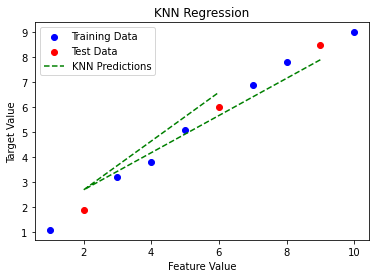

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# KNN Regression Algorithm
class KNNRegression:
    def __init__(self, k=3):
        self.k = k  # Number of nearest neighbors

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for test_point in X_test:
            distances = np.linalg.norm(self.X_train - test_point, axis=1)  # Euclidean distance
            neighbors_indices = np.argsort(distances)[:self.k]  # Get the indices of the k nearest neighbors
            y_pred.append(np.mean(self.y_train[neighbors_indices]))  # Average of nearest neighbors' targets
        return np.array(y_pred)

# Create a small synthetic dataset for regression
# X represents the features and y represents the continuous target variable

X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])  # Feature values
y = np.array([1.1, 1.9, 3.2, 3.8, 5.1, 6.0, 6.9, 7.8, 8.5, 9.0])  # Continuous target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the KNN regression model
knn = KNNRegression(k=3)  # Using 3 nearest neighbors
knn.fit(X_train, y_train)

# Predict the target values on the test set
y_pred = knn.predict(X_test)

# Print the results
print("Actual Values:", y_test)
print("Predicted Values:", y_pred)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_test, y_pred, color='green', label='KNN Predictions', linestyle='--')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.title('KNN Regression')
plt.legend()
plt.show()


# k-Nearest Neighbor (KNN) Iris dataset

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from collections import Counter

# KNN Classifier implementation
class KNN:
    def __init__(self, k=3):
        self.k = k  # Number of nearest neighbors
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        y_pred = []
        for test_point in X_test:
            distances = np.linalg.norm(self.X_train - test_point, axis=1)  # Euclidean distance
            neighbors_indices = np.argsort(distances)[:self.k]  # Get the indices of the k nearest neighbors
            # Find the most common label among neighbors
            closest_labels = self.y_train[neighbors_indices]
            most_common_label = Counter(closest_labels).most_common(1)[0][0]
            y_pred.append(most_common_label)
        return np.array(y_pred)

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target (Iris flower species)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the KNN classifier
knn = KNN(k=3)  # Using 3 nearest neighbors
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Print the correct and incorrect predictions
print("Correct predictions:")
for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        print(f"Sample {i+1}: True Label = {iris.target_names[y_test[i]]}, Predicted = {iris.target_names[y_pred[i]]}")

print("\nIncorrect predictions:")
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        print(f"Sample {i+1}: True Label = {iris.target_names[y_test[i]]}, Predicted = {iris.target_names[y_pred[i]]}")

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Correct predictions:
Sample 1: True Label = versicolor, Predicted = versicolor
Sample 2: True Label = setosa, Predicted = setosa
Sample 3: True Label = virginica, Predicted = virginica
Sample 4: True Label = versicolor, Predicted = versicolor
Sample 5: True Label = versicolor, Predicted = versicolor
Sample 6: True Label = setosa, Predicted = setosa
Sample 7: True Label = versicolor, Predicted = versicolor
Sample 8: True Label = virginica, Predicted = virginica
Sample 9: True Label = versicolor, Predicted = versicolor
Sample 10: True Label = versicolor, Predicted = versicolor
Sample 11: True Label = virginica, Predicted = virginica
Sample 12: True Label = setosa, Predicted = setosa
Sample 13: True Label = setosa, Predicted = setosa
Sample 14: True Label = setosa, Predicted = setosa
Sample 15: True Label = setosa, Predicted = setosa
Sample 16: True Label = versicolor, Predicted = versicolor
Sample 17: True Label = virginica, Predicted = virginica
Sample 18: True Label = versicolor, Predi

# Locally Weighted Regression algorithm

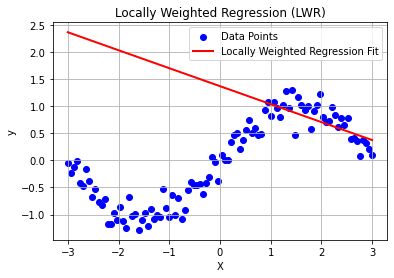

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Locally Weighted Regression (LWR) implementation
def locally_weighted_regression(X, y, tau=1.0):
    """
    Locally Weighted Linear Regression (LWR).
    
    Parameters:
    X : array-like, shape (n_samples, n_features)
        Input data.
    y : array-like, shape (n_samples,)
        Target values.
    tau : float, optional (default=1.0)
        The width of the local neighborhood (smoothing parameter).
    
    Returns:
    theta : array, shape (n_features,)
        The learned regression coefficients (parameters).
    """
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]  # Add intercept term (bias)
    
    # Store theta values (parameters)
    theta = np.zeros(X_b.shape[1])

    for i in range(m):
        # Compute the weights for the current point i
        weights = np.exp(-np.sum((X_b - X_b[i]) ** 2, axis=1) / (2 * tau ** 2))
        W = np.diag(weights)  # Diagonal weight matrix
        
        # Perform the weighted least squares regression
        theta_i = np.linalg.inv(X_b.T @ W @ X_b) @ X_b.T @ W @ y
        theta = theta_i

    return theta

def predict(X, theta):
    """
    Predict values using the locally weighted regression model.
    
    Parameters:
    X : array-like, shape (n_samples, n_features)
        Input data.
    theta : array, shape (n_features,)
        The regression coefficients (parameters).
    
    Returns:
    predictions : array, shape (n_samples,)
        Predicted values.
    """
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add intercept term (bias)
    return X_b @ theta  # Return the predictions

# Generate synthetic non-linear data (e.g., quadratic curve)
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)  # Feature (independent variable)
y = np.sin(X).ravel() + 0.2 * np.random.randn(100)  # Target (dependent variable with noise)

# Fit the Locally Weighted Regression model
tau = 1.0  # Local weight parameter
theta = locally_weighted_regression(X, y, tau)

# Predict using the learned model
X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = predict(X_test, theta)

# Plot the data and the regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_test, y_pred, color='red', label='Locally Weighted Regression Fit', linewidth=2)
plt.title('Locally Weighted Regression (LWR)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# Artificial Neural Network (ANN)

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def softmax_derivative(output):
    s = output.reshape(-1, 1)
    return np.diagflat(s) - np.dot(s, s.T)

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Initialize parameters
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def forward(self, X):
        # Forward pass
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = softmax(self.output_input)
        return self.output

    def backward(self, X, y, output):
        # Backpropagation
        output_error = output - y
        hidden_error = np.dot(output_error, self.weights_hidden_output.T) * sigmoid_derivative(self.hidden_output)

        # Update weights and biases using gradient descent
        self.weights_hidden_output -= self.learning_rate * np.dot(self.hidden_output.T, output_error)
        self.bias_output -= self.learning_rate * np.sum(output_error, axis=0, keepdims=True)
        self.weights_input_hidden -= self.learning_rate * np.dot(X.T, hidden_error)
        self.bias_hidden -= self.learning_rate * np.sum(hidden_error, axis=0, keepdims=True)

    def train(self, X_train, y_train, epochs=1000):
        # Train the neural network
        for epoch in range(epochs):
            output = self.forward(X_train)
            self.backward(X_train, y_train, output)

    def predict(self, X):
        # Make predictions
        output = self.forward(X)
        return np.argmax(output, axis=1)

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target labels
y_one_hot = np.zeros((y.shape[0], 3))
y_one_hot[np.arange(y.shape[0]), y] = 1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the neural network
input_size = X_train.shape[1]
hidden_size = 5  # Example hidden layer size
output_size = y_train.shape[1]
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train the model
nn.train(X_train, y_train, epochs=10000)

# Test the model
y_pred = nn.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 95.56%


# Q-learning algorithm

Episode 100/1000, Total Reward: 89
Episode 200/1000, Total Reward: 91
Episode 300/1000, Total Reward: 92
Episode 400/1000, Total Reward: 92
Episode 500/1000, Total Reward: 86
Episode 600/1000, Total Reward: 91
Episode 700/1000, Total Reward: 91
Episode 800/1000, Total Reward: 92
Episode 900/1000, Total Reward: 92
Episode 1000/1000, Total Reward: 88


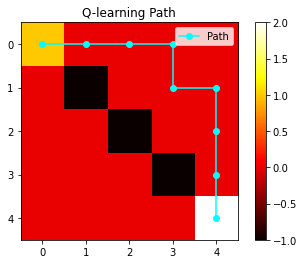

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Environment setup
grid_size = 5  # 5x5 grid
goal_position = (4, 4)  # The goal is at the bottom-right corner
start_position = (0, 0)  # Starting at the top-left corner
walls = [(1, 1), (2, 2), (3, 3)]  # Some obstacles (walls)

# Actions: up, down, left, right
actions = ['up', 'down', 'left', 'right']
action_map = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.2  # Exploration rate
episodes = 1000  # Number of training episodes

# Initialize Q-table
Q = np.zeros((grid_size, grid_size, len(actions)))  # Q(s, a) table

# Define the reward structure
def get_reward(position):
    if position == goal_position:
        return 100  # Reward for reaching the goal
    elif position in walls:
        return -10  # Penalty for hitting a wall
    else:
        return -1  # Small penalty for each move

# Choose an action using epsilon-greedy strategy
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        return random.choice(range(len(actions)))  # Exploration
    else:
        return np.argmax(Q[state[0], state[1]])  # Exploitation

# Move the agent in the grid based on the chosen action
def move(state, action):
    new_state = (state[0] + action_map[actions[action]][0], 
                 state[1] + action_map[actions[action]][1])
    # Check if new state is within bounds
    new_state = (max(0, min(grid_size-1, new_state[0])), max(0, min(grid_size-1, new_state[1])))
    if new_state in walls:
        return state  # If there's a wall, stay in the same position
    return new_state

# Training the agent using Q-learning
def train():
    for episode in range(episodes):
        state = start_position
        total_reward = 0
        while state != goal_position:
            action = choose_action(state)
            next_state = move(state, action)
            reward = get_reward(next_state)
            total_reward += reward
            # Q-learning update rule
            Q[state[0], state[1], action] += alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action])
            state = next_state
        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}")

# Testing the learned policy
def test():
    state = start_position
    path = [state]
    while state != goal_position:
        action = np.argmax(Q[state[0], state[1]])  # Choose the best action based on Q-table
        state = move(state, action)
        path.append(state)
    return path

# Visualize the grid and the agent's path
def visualize(path):
    grid = np.zeros((grid_size, grid_size))
    for (i, j) in walls:
        grid[i, j] = -1  # Mark walls
    grid[goal_position[0], goal_position[1]] = 2  # Mark goal
    grid[start_position[0], start_position[1]] = 1  # Mark start

    # Plot the grid
    plt.imshow(grid, cmap='hot', interpolation='nearest')
    plt.colorbar()
    path_x, path_y = zip(*path)
    plt.plot(path_y, path_x, marker='o', color='cyan', label='Path')
    plt.title("Q-learning Path")
    plt.legend()
    plt.show()

# Train the agent
train()

# Test the learned policy
path = test()

# Visualize the agent's path
visualize(path)



# Natural Language Processing (NLP) tasks using NLTK

In [13]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk import download

# Download necessary NLTK datasets
download('punkt')  # For tokenization
download('stopwords')  # For stop words
download('averaged_perceptron_tagger')  # For POS tagging

# Sample text
text = "NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources."

# 1. Tokenization by Word
words = word_tokenize(text)
print("Words Tokenization:")
print(words)
print()

# 2. Tokenization by Sentence
sentences = sent_tokenize(text)
print("Sentence Tokenization:")
print(sentences)
print()

# 3. Eliminating Stop Words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]
print("After Stopword Removal:")
print(filtered_words)
print()

# 4. Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
print("After Stemming:")
print(stemmed_words)
print()

# 5. Parts of Speech Tagging
pos_tags = pos_tag(filtered_words)
print("Parts of Speech Tagging:")
print(pos_tags)


[nltk_data] Downloading package punkt to C:\Users\somana
[nltk_data]     gouda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\somana
[nltk_data]     gouda\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\somana gouda\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Words Tokenization:
['NLTK', 'is', 'a', 'leading', 'platform', 'for', 'building', 'Python', 'programs', 'to', 'work', 'with', 'human', 'language', 'data', '.', 'It', 'provides', 'easy-to-use', 'interfaces', 'to', 'over', '50', 'corpora', 'and', 'lexical', 'resources', '.']

Sentence Tokenization:
['NLTK is a leading platform for building Python programs to work with human language data.', 'It provides easy-to-use interfaces to over 50 corpora and lexical resources.']

After Stopword Removal:
['NLTK', 'leading', 'platform', 'building', 'Python', 'programs', 'work', 'human', 'language', 'data', '.', 'provides', 'easy-to-use', 'interfaces', '50', 'corpora', 'lexical', 'resources', '.']

After Stemming:
['nltk', 'lead', 'platform', 'build', 'python', 'program', 'work', 'human', 'languag', 'data', '.', 'provid', 'easy-to-us', 'interfac', '50', 'corpora', 'lexic', 'resourc', '.']

Parts of Speech Tagging:
[('NLTK', 'NNP'), ('leading', 'VBG'), ('platform', 'NN'), ('building', 'NN'), ('Python'